In [47]:
import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 250
import numpy as np
import torch 

In [48]:
folder_cosmic_survey= '...\\'
folder_deepfield = '...\\'
file_loss = 'z32_beta0.1_losscvae.pt'

In [49]:
train_loss, val_loss, mse, kl, hyperparameters = torch.load(folder_cosmic_survey+ file_loss)

In [50]:
batch_size = hyperparameters["batch size"]
num_epochs = hyperparameters["epochs"]
beta = hyperparameters["beta"]
lr = hyperparameters["learning rate"]
z_dim = hyperparameters["z_dim"]

In [51]:
train_iterations_per_epoch = len(train_loss)//num_epochs
val_iterations_per_epoch = len(val_loss)//num_epochs
epochs = np.linspace(1, num_epochs, num_epochs)

train_loss_epoch = []
val_loss_epoch = []
mse_epoch = []
kl_epoch = []

for i, j in enumerate(epochs):
    j = int(j)
    avg_train_loss = train_loss[i*train_iterations_per_epoch: j*train_iterations_per_epoch].mean() 
    train_loss_epoch.append(avg_train_loss)
    
    avg_val_loss = val_loss[i*val_iterations_per_epoch : j*val_iterations_per_epoch].mean()
    val_loss_epoch.append(avg_val_loss)

    avg_mse = mse[i*train_iterations_per_epoch: j*train_iterations_per_epoch].mean()
    mse_epoch.append(avg_mse)

    avg_kl = kl[i*train_iterations_per_epoch: j*train_iterations_per_epoch].mean()
    kl_epoch.append(avg_kl)


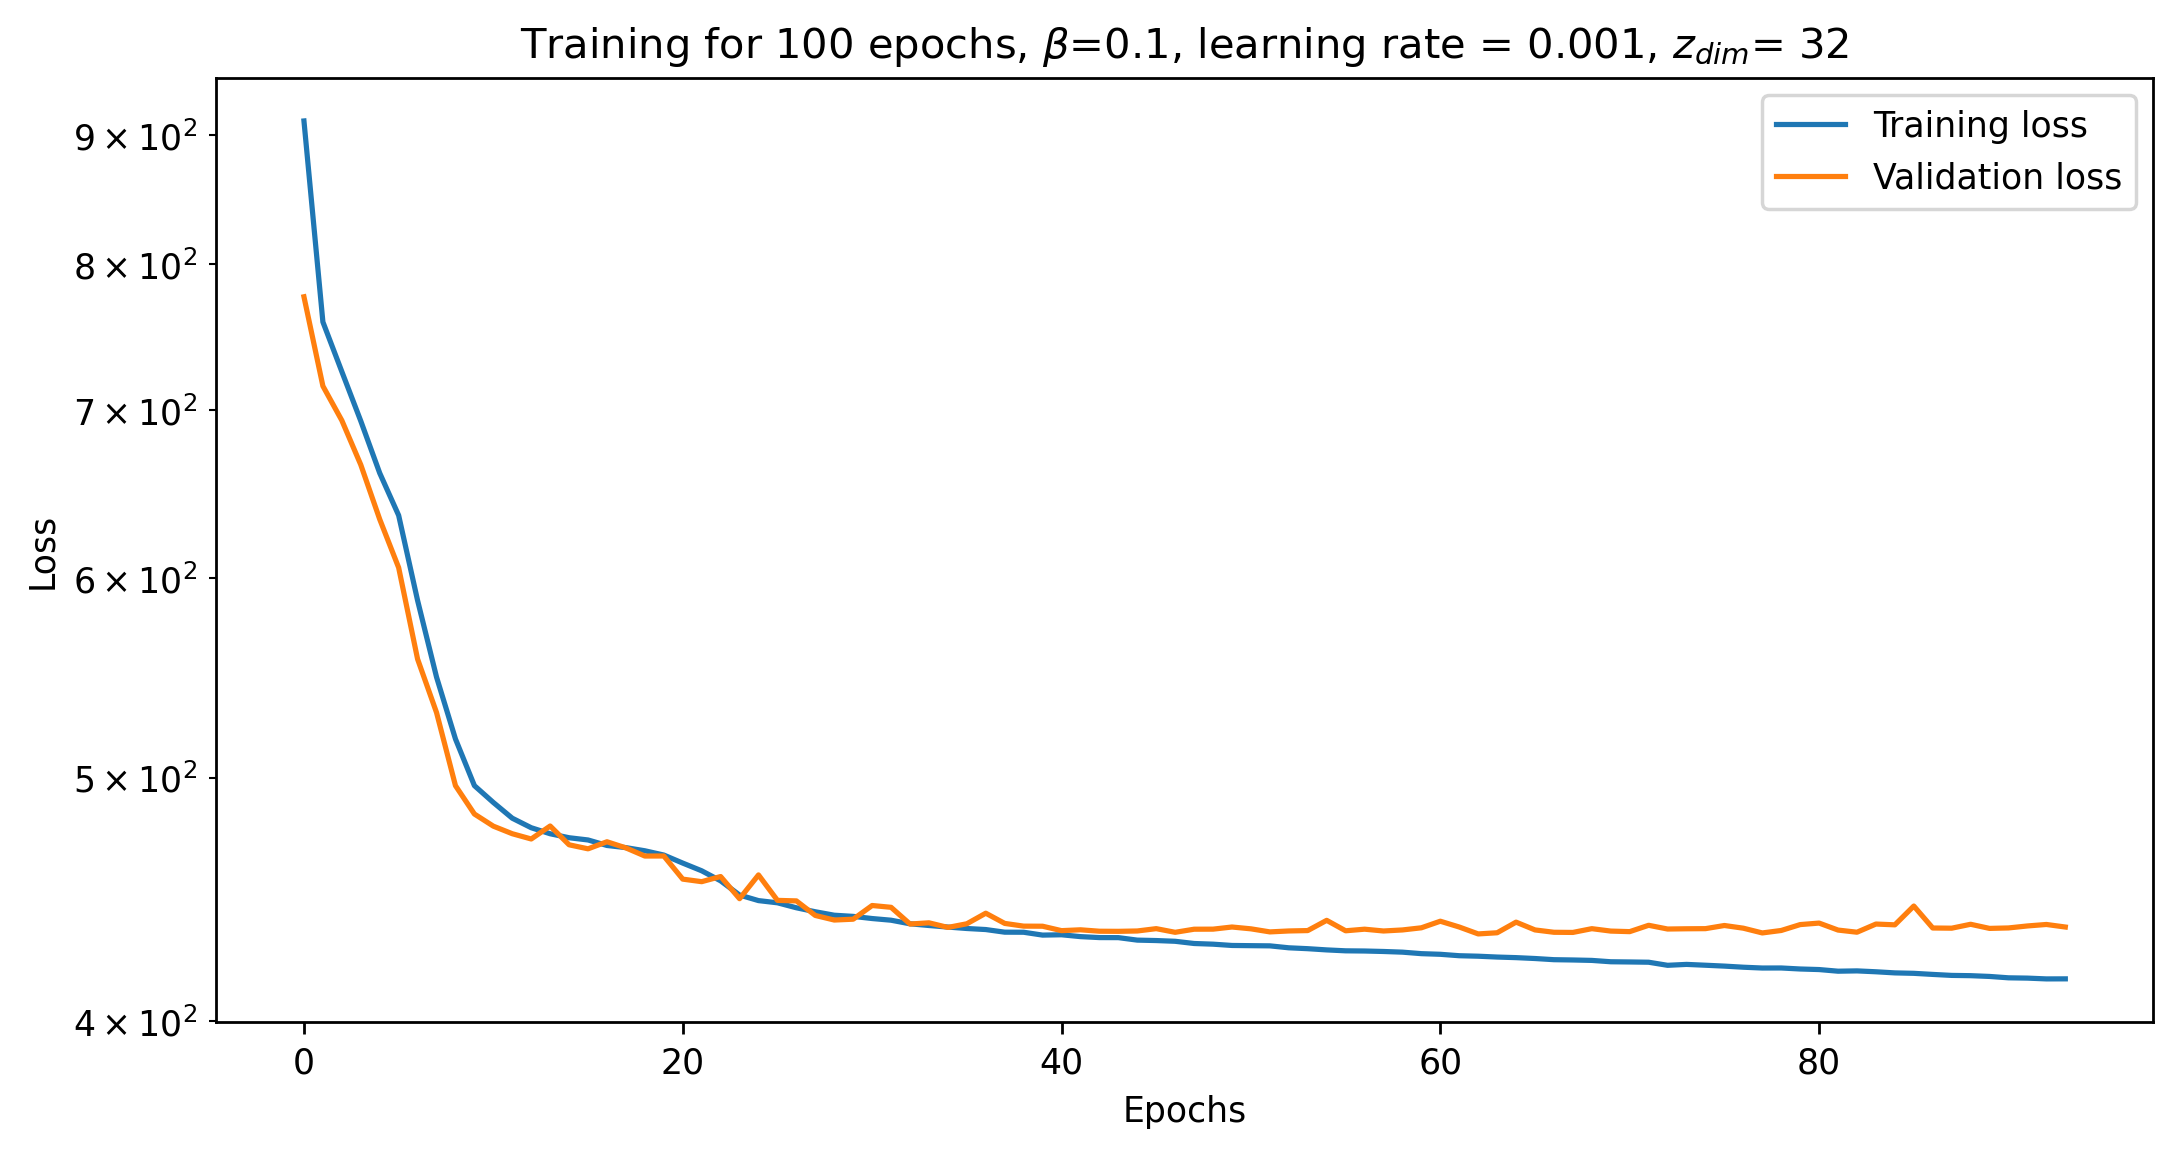

In [52]:
figure = plt.figure(figsize=(10, 5))
plt.plot(train_loss_epoch[5:-1], label = 'Training loss')
plt.plot(val_loss_epoch[5:-1], label = 'Validation loss')
plt.yscale('log')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title(f'Training for {num_epochs} epochs, '+ r'$\beta$'+f'={beta}, learning rate = {lr}, ' r'$z_{dim}$'+ f'= {z_dim}')

image_path = '...\\'
file_name = 'Loss_cvae2_z32_beta0.1.jpeg'
#plt.savefig(image_path + file_name)

In [53]:
epochs =[25, 50, 99]

for i in range(len(epochs)):
    epoch = epochs[i]
    print(f"Epoch {epoch}: Mse = {mse_epoch[epoch]:.1f}, Kl = {kl_epoch[epoch]:.1f} ; Loss = {train_loss_epoch[epoch]:.1f} " )

Epoch 25: Mse = 404.1, Kl = 582.5 ; Loss = 462.3 
Epoch 50: Mse = 368.5, Kl = 622.4 ; Loss = 430.7 
Epoch 99: Mse = 351.9, Kl = 634.6 ; Loss = 415.4 


In [54]:
print(np.array(val_loss_epoch).min(), 
np.array(val_loss_epoch).argmin())

433.33607161045074 67
